In [ ]:
# Dự đoán
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, GRU, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===== Hàm xây dựng mô hình Bi-GRU + CNN =====
def build_bigru_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(64, return_sequences=True))(inputs)
    x = Bidirectional(GRU(64, return_sequences=True))(x)

    x = Conv1D(filters=64, kernel_size=5, activation='selu', padding='same')(x)
    x = Conv1D(filters=64, kernel_size=5, activation='selu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)

    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='mse')
    return model

# ===== Hàm đọc dữ liệu Bitcoin từ file CSV =====
def load_bitcoin_data_csv(path):
    df = pd.read_csv(path)
    columns_needed = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in columns_needed:
        if col not in df.columns:
            raise ValueError(f"Thiếu cột '{col}' trong dữ liệu.")
    df = df[columns_needed].dropna()
    return df

# ===== Hàm chuẩn bị dữ liệu theo chuỗi thời gian =====
def prepare_data(df, time_steps=60):
    scaler_X = MinMaxScaler()
    data_X = scaler_X.fit_transform(df)

    scaler_y = MinMaxScaler()
    data_y = scaler_y.fit_transform(df[['Close']])

    X, y = [], []
    for i in range(time_steps, len(df)):
        X.append(data_X[i-time_steps:i])
        y.append(data_y[i])
    return np.array(X), np.array(y), scaler_X, scaler_y


# ===== Đọc và chuẩn bị dữ liệu =====
path = 'data/BTCUSDT-1h-BINANCE.csv'
data = load_bitcoin_data_csv(path)
X, y, scaler_X, scaler_y = prepare_data(data, time_steps=60)

# ===== Chia dữ liệu train/test =====
split = int(0.75 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# ===== Xây dựng và huấn luyện mô hình =====
model = build_bigru_cnn_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# ===== Dự đoán =====
predictions = model.predict(X_test)

# ===== Giải tỉ lệ để đánh giá =====
predictions = scaler_y.inverse_transform(predictions)
y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# ===== Đánh giá hiệu suất mô hình =====
mae = mean_absolute_error(y_test_true, predictions)
mse = mean_squared_error(y_test_true, predictions)
r2 = r2_score(y_test_true, predictions)

print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (R-squared score): {r2:.4f}")


Epoch 1/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0088 - val_loss: 0.0021
Epoch 2/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0017 - val_loss: 7.4938e-04
Epoch 3/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 4/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 9.5536e-04 - val_loss: 0.0014
Epoch 5/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 8.4223e-04 - val_loss: 1.8222e-04
Epoch 6/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 7.4794e-04 - val_loss: 5.0700e-04
Epoch 7/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 7.4086e-04 - val_loss: 1.8616e-04
Epoch 8/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 7.0561e-04 - val_loss: 0.0016
Epoch 9/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 8.5045e-04 - val_loss: 1.2387e-04
Epoch 10/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 6.9877e-04 - val_loss: 1.0813e-04
Epoch 11/50
828/828 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 6.70

In [15]:
#GRU
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===== Hàm xây dựng mô hình GRU đơn thuần =====
def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(64, return_sequences=True)(inputs)
    x = GRU(32)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# ===== Hàm đọc dữ liệu Bitcoin từ file CSV =====
def load_bitcoin_data_csv(path):
    df = pd.read_csv(path)
    columns_needed = ['Open', 'High', 'Low', 'Close', 'Volume']

    for col in columns_needed:
        if col not in df.columns:
            raise ValueError(f"Thiếu cột '{col}' trong dữ liệu.")
    df = df[columns_needed].dropna()
    return df

# ===== Hàm chuẩn bị dữ liệu =====
def prepare_data(df, time_steps=60):
    scaler_X = MinMaxScaler()
    data_X = scaler_X.fit_transform(df)

    scaler_y = MinMaxScaler()
    data_y = scaler_y.fit_transform(df[['Close']])

    X, y = [], []
    for i in range(time_steps, len(df)):
        X.append(data_X[i-time_steps:i])
        y.append(data_y[i])
    return np.array(X), np.array(y), scaler_X, scaler_y

# ===== Load & chuẩn bị dữ liệu =====
path = 'data/BTCUSDT-1h-BINANCE.csv'
data = load_bitcoin_data_csv(path)
X, y, scaler_X, scaler_y = prepare_data(data, time_steps=60)

# ===== Chia train/test =====
split = int(0.75 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# ===== Xây dựng & huấn luyện GRU đơn thuần =====
model = build_gru_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# ===== Dự đoán & đánh giá =====
predictions = model.predict(X_test)
predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print(f"MAE: {mean_absolute_error(y_test_inv, predictions_inv):.4f}")
print(f"MSE: {mean_squared_error(y_test_inv, predictions_inv):.4f}")
print(f"R2 : {r2_score(y_test_inv, predictions_inv):.4f}")

Epoch 1/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0084 - val_loss: 0.0016
Epoch 2/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0021 - val_loss: 1.0057e-04
Epoch 3/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 4/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0014 - val_loss: 2.1118e-04
Epoch 6/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 7/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0014 - val_loss: 8.2217e-04
Epoch 8/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0013 - val_loss: 9.4023e-05
Epoch 9/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0012 - val_loss: 5.5463e-05
Epoch 10/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0014 - val_loss: 2.8619e-04
Epoch 11/30
828/828 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0012 - val_loss: 5.9501e-04
Ep

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0124 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0020 - val_loss: 3.3884e-04 - learning_rate: 0.0010
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0019 - val_loss: 5.7959e-04 - learning_rate: 0.0010
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0016 - val_loss: 8.9028e-04 - learning_rate: 0.0010
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - val_loss: 2.5273e-04 - learning_rate: 0.0010
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0012 - val_loss: 1.6580e-04 - learning_rate: 5.0000e-04
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010 - val_loss: 1.1614e-04 - learning_rate: 5.0000e-04
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010 - val_loss: 1.7059e-04 - learning_rate: 5.0000e-04
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0010 - va

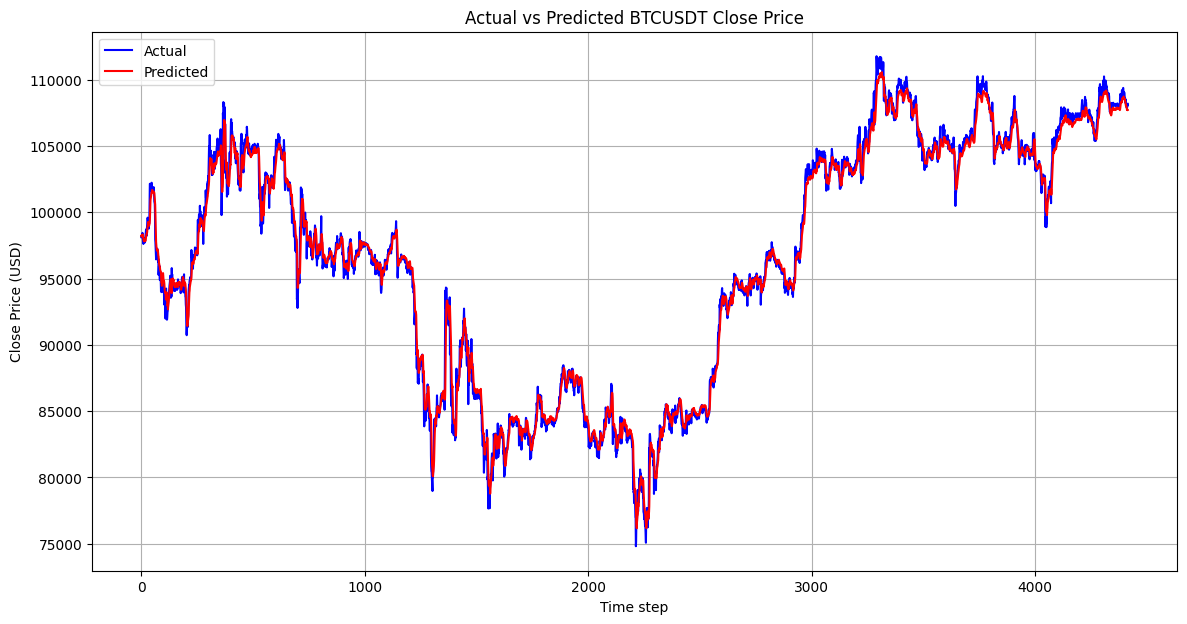

In [14]:
# CNN+BiGRU + EarlyStopping + ReduceLR
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, GRU, Conv1D, MaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===== Hàm xây dựng mô hình CNN + BiGRU =====
def build_cnn_bigru_model(input_shape):
    inputs = Input(shape=input_shape)

    # CNN để học pattern ngắn hạn
    x = Conv1D(filters=32, kernel_size=5, activation='selu', padding='same')(inputs)
    x = Conv1D(filters=32, kernel_size=5, activation='selu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # BiGRU để học quan hệ dài hạn
    x = Bidirectional(GRU(32, return_sequences=False))(x)

    # Dense & Dropout
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# ===== Hàm đọc dữ liệu Bitcoin từ file CSV =====
def load_bitcoin_data_csv(path):
    df = pd.read_csv(path)
    columns_needed = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in columns_needed:
        if col not in df.columns:
            raise ValueError(f"Thiếu cột '{col}' trong dữ liệu.")
    df = df[columns_needed].dropna()
    return df

# ===== Hàm chuẩn bị dữ liệu theo chuỗi thời gian =====
def prepare_data(df, time_steps=60):
    scaler_X = MinMaxScaler()
    data_X = scaler_X.fit_transform(df)

    scaler_y = MinMaxScaler()
    data_y = scaler_y.fit_transform(df[['Close']])

    X, y = [], []
    for i in range(time_steps, len(df)):
        X.append(data_X[i-time_steps:i])
        y.append(data_y[i])
    return np.array(X), np.array(y), scaler_X, scaler_y

# ===== Đọc và chuẩn bị dữ liệu =====
path = 'data/BTCUSDT-1h-BINANCE.csv'
data = load_bitcoin_data_csv(path)
X, y, scaler_X, scaler_y = prepare_data(data, time_steps=60)

# ===== Chia dữ liệu train/test =====
split = int(0.75 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# ===== Tạo mô hình =====
model = build_cnn_bigru_model((X_train.shape[1], X_train.shape[2]))

# ===== Callbacks: EarlyStopping + ReduceLR =====
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,             # chờ 5 epoch không giảm thì dừng
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,             # giảm LR 1/2
    patience=3,             # chờ 3 epoch không giảm
    min_lr=1e-6
)

# ===== Huấn luyện mô hình với Callbacks =====
history = model.fit(
    X_train, y_train,
    epochs=50,              # cho số lớn, EarlyStopping tự dừng
    batch_size=64,          # batch_size lớn hơn để nhanh hơn
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ===== Dự đoán =====
predictions = model.predict(X_test)

# ===== Giải tỉ lệ =====
predictions = scaler_y.inverse_transform(predictions)
y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# ===== Đánh giá =====
mae = mean_absolute_error(y_test_true, predictions)
mse = mean_squared_error(y_test_true, predictions)
r2 = r2_score(y_test_true, predictions)

print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (R-squared score): {r2:.4f}")

import matplotlib.pyplot as plt

# ===== Vẽ biểu đồ so sánh =====
plt.figure(figsize=(14, 7))
plt.plot(y_test_true, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')

plt.title('Actual vs Predicted BTCUSDT Close Price')
plt.xlabel('Time step')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()